In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

In [2]:
df = pd.read_csv('./housing.csv', encoding='latin1')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
updated_df = df

In [5]:
updated_df['total_bedrooms'] = updated_df['total_bedrooms'].fillna(updated_df['total_bedrooms'].mode()[0])

In [6]:
print(updated_df.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [7]:
# Features
X = updated_df[['median_income']]  # shape: (20640, 1)
# Target
y = updated_df['median_house_value']  # shape: (20640,)

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [12]:
y_pred = regressor.predict(X_test)

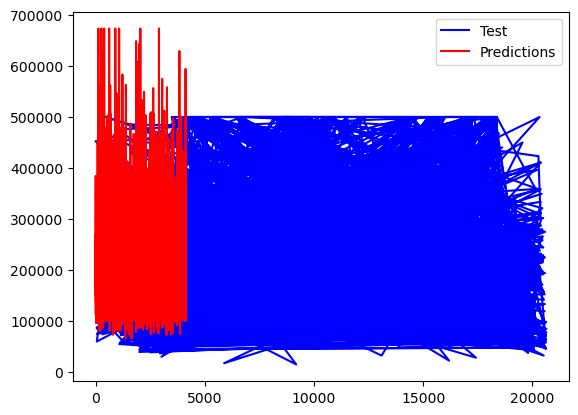

In [13]:
plt.plot(y_test, color='blue', label='Test')
plt.plot(y_pred, color='red', label='Predictions')
plt.legend()
plt.show()

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [15]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import root_mean_squared_error

Simple Linear Regression (SLR)

In [16]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

MAE: 62990.86530093761
MSE: 7091157771.76555
RMSE: 84209.01241414454
R2 Score: 0.45885918903846656
